<a href="https://colab.research.google.com/github/arpitawad04/Market-Basket-Analysis-Using-Apriori-Algorithm/blob/main/Market_Basket_Analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import required packages
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load dataset

In [5]:
#Load the dataset
df=pd.read_excel('D:/M3 - Q1/Market-Basket-Analysis-Using-Apriori-Algorithm-main/Market-Basket-Analysis-Using-Apriori-Algorithm-main/Market_basket_Analysis_dataset.xlsx',header=None)

In [6]:
#Have a look at first five rows of dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Exploratory Data Analysis

In [7]:
# let's describe the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


As we can see from above output,this is a Sparse matrix having lots of NaN values.

In [8]:
#Fill NaN values with zeroes
df.fillna(0,inplace=True)

#Check for Sparsity percentage of dataframe

In [9]:
list_count_of_non_zeroes=[]
list_count_of_zeroes=[]
for column_name in df.columns:
    column = df[column_name]
  
    # Get the count of non-Zeros & non NaN values in column
    count_of_non_zeros = column[column != 0].count()
    list_count_of_non_zeroes.append(count_of_non_zeros)
    # Get the count of non-Zeros & non NaN values in column
    count_zeros_values = column[column == 0].count()
    list_count_of_zeroes.append(count_zeros_values)
 
print(  'Total Count of non zeros is : ',sum(list_count_of_non_zeroes))
print(  'Total Count of zeros is : ',sum(list_count_of_zeroes))

Total Count of non zeros is :  29363
Total Count of zeros is :  120657


In [10]:
print("Sparsity in dataframe is :",sum(list_count_of_zeroes)/(sum(list_count_of_zeroes)+sum(list_count_of_non_zeroes)))

Sparsity in dataframe is : 0.8042727636315158


Around 80% of the dataframe is sparse only 20% are having values other than 0.

In [11]:
#Find unique name of items present in whole dataframe
all_columns_unqiue_added=[]
for i in range(20):
  a=df[i].unique()
  all_columns_unqiue_added.append(a)

In [12]:
#Convert 2D list to 1D using list comprehension
flat_list = [item for sublist in all_columns_unqiue_added for item in sublist]


In [13]:
#Again find unique items from entire 1 D list of items obtained
all_items_list=list(set(flat_list))

In [14]:
#Contains all items list excluding 0
all_items_list= [i for i in all_items_list if i != 0]
#all_items_list

In [15]:
#Dictionary having key and values pair for each item,key represent index and value is item name
all_items_dict=[(k,v) for k,v in enumerate(all_items_list)]
all_items_dict

[(0, 'magazines'),
 (1, 'herb & pepper'),
 (2, 'shampoo'),
 (3, 'cake'),
 (4, 'extra dark chocolate'),
 (5, 'vegetables mix'),
 (6, 'mayonnaise'),
 (7, 'fromage blanc'),
 (8, 'almonds'),
 (9, 'strawberries'),
 (10, 'cauliflower'),
 (11, 'soda'),
 (12, 'corn'),
 (13, 'chocolate'),
 (14, 'oil'),
 (15, 'escalope'),
 (16, 'burger sauce'),
 (17, 'pickles'),
 (18, 'green beans'),
 (19, 'water spray'),
 (20, 'chicken'),
 (21, 'eggplant'),
 (22, 'cottage cheese'),
 (23, 'sparkling water'),
 (24, 'energy bar'),
 (25, 'barbecue sauce'),
 (26, 'french wine'),
 (27, 'salad'),
 (28, 'yams'),
 (29, 'green grapes'),
 (30, 'salmon'),
 (31, 'olive oil'),
 (32, 'whole weat flour'),
 (33, 'clothes accessories'),
 (34, 'asparagus'),
 (35, 'whole wheat rice'),
 (36, 'strong cheese'),
 (37, 'burgers'),
 (38, 'oatmeal'),
 (39, 'tomato sauce'),
 (40, 'bug spray'),
 (41, 'body spray'),
 (42, 'zucchini'),
 (43, 'pasta'),
 (44, 'hand protein bar'),
 (45, 'whole wheat pasta'),
 (46, 'salt'),
 (47, 'flax seed'),
 

In [16]:
#Create new empty dataframe having columns as all the items 
df2=pd.DataFrame(columns=all_items_list)

In [17]:
#Look at dataframe structure
df2.head()

,magazines,herb & pepper,shampoo,cake,extra dark chocolate,vegetables mix,mayonnaise,fromage blanc,almonds,strawberries,...,light cream,gluten free bar,ham,milk,spinach,mint,carrots,mashed potato,sandwich,chutney


#Create dataframe by mapping each row items in their respective columns
Like 'chicken' if present in any row ,so it will be indicated as 1 in that row under 'chciken' column.

In [18]:

for s in range(len(df)):
  m=df.iloc[s,:]
  #print(m)
  index_list=[]
  for k in m:
    if k in all_items_list:
      index=all_items_list.index(k)
      index_list.append(index)
    #print(index_list)
  n=m.isin(all_items_list)
  n=n.astype(int)
  for l,r in zip(n,index_list):
    if sum(n)>1:
      if n[l]==1:
        #print("True")
        df2.at[s,all_items_dict[r][1]]=1
     
    elif sum(n)==1:
      df2.at[s,all_items_dict[r][1]]=1
      #print("elsif True")
  


In [19]:
#Check after mapping our new dataframe is having same number of records as original dataframe
len(df2)

7501

In [20]:
#Only position where value is present is mapped other positions are left NaN,so fill them with zeroes
df2.fillna(0,inplace=True)

In [21]:
df2.head()

,magazines,herb & pepper,shampoo,cake,extra dark chocolate,vegetables mix,mayonnaise,fromage blanc,almonds,strawberries,...,light cream,gluten free bar,ham,milk,spinach,mint,carrots,mashed potato,sandwich,chutney
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
#Count in how many transactions 'mineral water' has occured
df2['mineral water'].sum()

1788

#Visualisation

#Lets look at Most popular Items bought in first place by customers

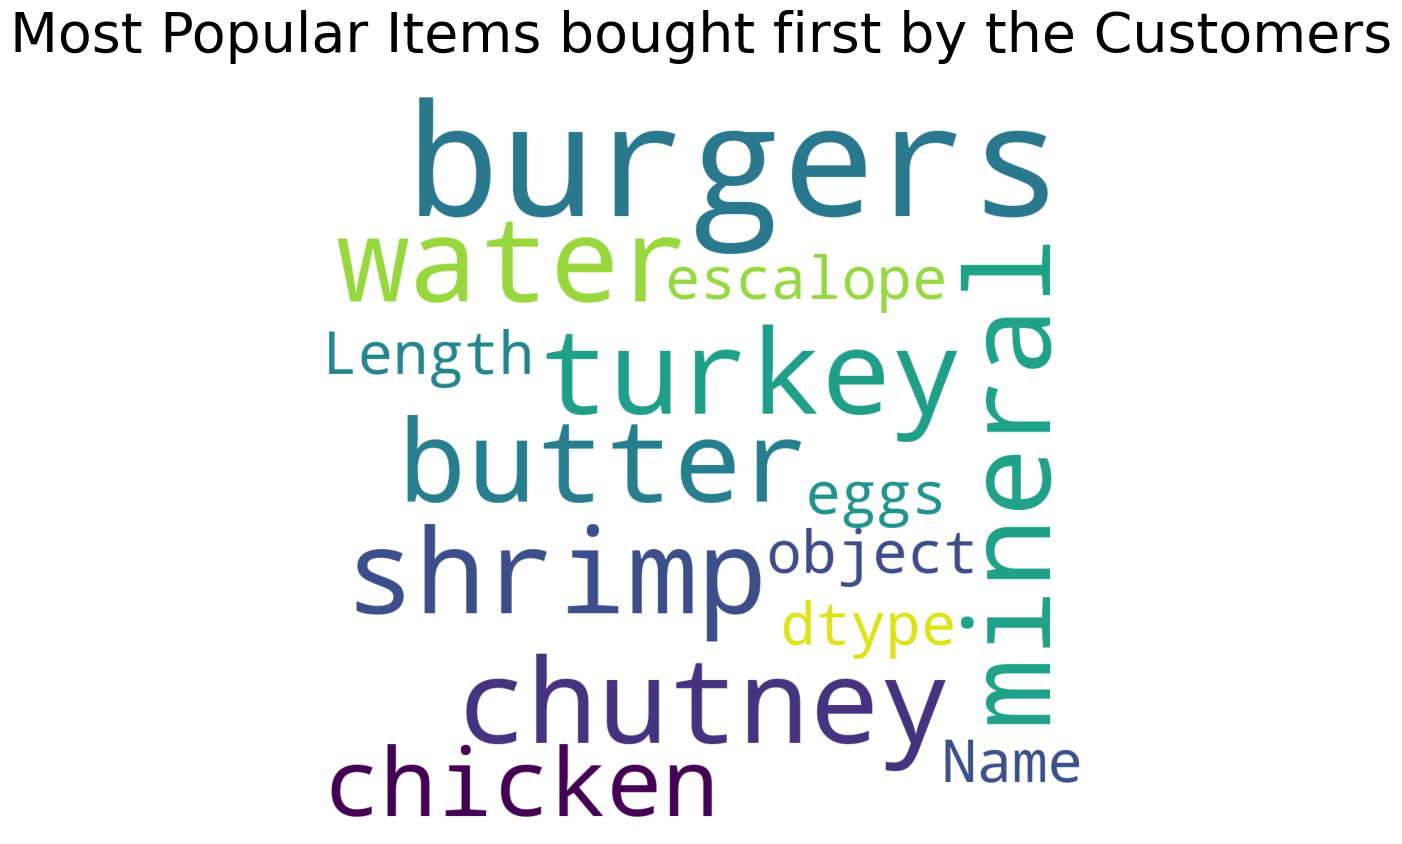

In [24]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()


As we can see from the Word cloud,\
Burgers,Mineral water,Chicken,shrimp etc are most popular bought items in first place

From the above plot ,it can be seen that burgers and turkey are most frequently bought first item by customers.

In [26]:
#Count the number of values for each items in entire dataframe records and store it in list 'all_itmes_count_list'
all_items_count_list=[]
for col in df2.columns:
  a=df2[col].sum()
  all_items_count_list.append(a)


In [27]:
all_items_count_list

[82,
 371,
 37,
 608,
 90,
 193,
 46,
 102,
 153,
 160,
 36,
 47,
 36,
 1229,
 173,
 595,
 44,
 45,
 65,
 3,
 450,
 99,
 239,
 47,
 203,
 81,
 169,
 37,
 86,
 68,
 319,
 494,
 70,
 63,
 36,
 439,
 58,
 654,
 33,
 106,
 65,
 86,
 71,
 118,
 39,
 221,
 69,
 68,
 226,
 65,
 78,
 603,
 101,
 713,
 143,
 124,
 356,
 33,
 228,
 199,
 107,
 1788,
 253,
 469,
 513,
 32,
 141,
 1282,
 574,
 715,
 1348,
 204,
 73,
 90,
 250,
 536,
 61,
 79,
 14,
 33,
 243,
 29,
 200,
 58,
 49,
 383,
 149,
 167,
 475,
 7,
 351,
 991,
 34,
 211,
 737,
 205,
 393,
 181,
 193,
 46,
 67,
 139,
 42,
 1306,
 5,
 157,
 379,
 323,
 69,
 117,
 52,
 199,
 972,
 53,
 131,
 115,
 31,
 34,
 31]

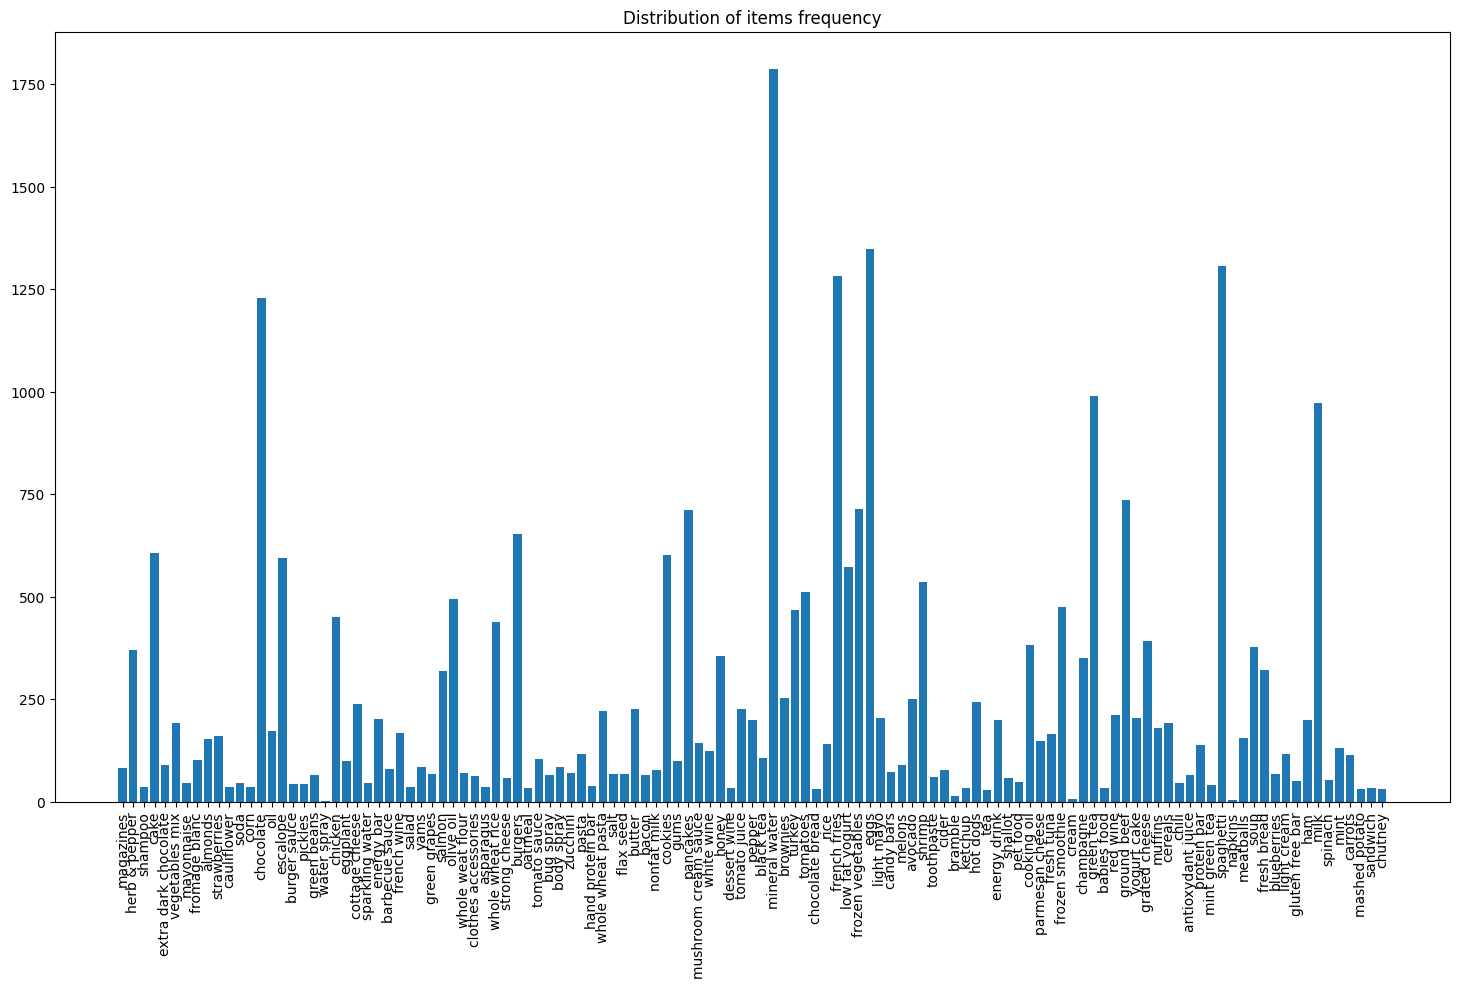

In [28]:
#Plot the items frequency 
plt.figure(figsize=(18,10))
plt.bar(df2.columns,all_items_count_list)
plt.xticks(rotation=90)
plt.title('Distribution of items frequency')
plt.show()


In [29]:
#Find items by counts which has appeared more than 225 times that is we are extracting 3% of the total records
b=np.array(all_items_count_list)>225


In [30]:
#Sort items index in descending order by counts
c=np.where(b==True)
d=np.sort(c)
e=np.flip(d)

flat_list2 = [item for sublist in list(e) for item in sublist]


In [31]:
#Find items having frequency count more than 225
df_columns_count_greater_225=df2.columns[flat_list2]
df_columns_count_greater_225

Index(['milk', 'fresh bread', 'soup', 'spaghetti', 'grated cheese',
       'ground beef', 'green tea', 'champagne', 'frozen smoothie',
       'cooking oil', 'hot dogs', 'shrimp', 'avocado', 'eggs',
       'frozen vegetables', 'low fat yogurt', 'french fries', 'tomatoes',
       'turkey', 'brownies', 'mineral water', 'tomato juice', 'honey',
       'pancakes', 'cookies', 'butter', 'burgers', 'whole wheat rice',
       'olive oil', 'salmon', 'cottage cheese', 'chicken', 'escalope',
       'chocolate', 'cake', 'herb & pepper'],
      dtype='object')

In [32]:
#Define function to find frequency count of items using indices obtained from flat_list2 having count more than 225
def findElements(lst1, lst2):
    return [lst1[i] for i in lst2]
count_items_greater_than_225=findElements(all_items_count_list,flat_list2)

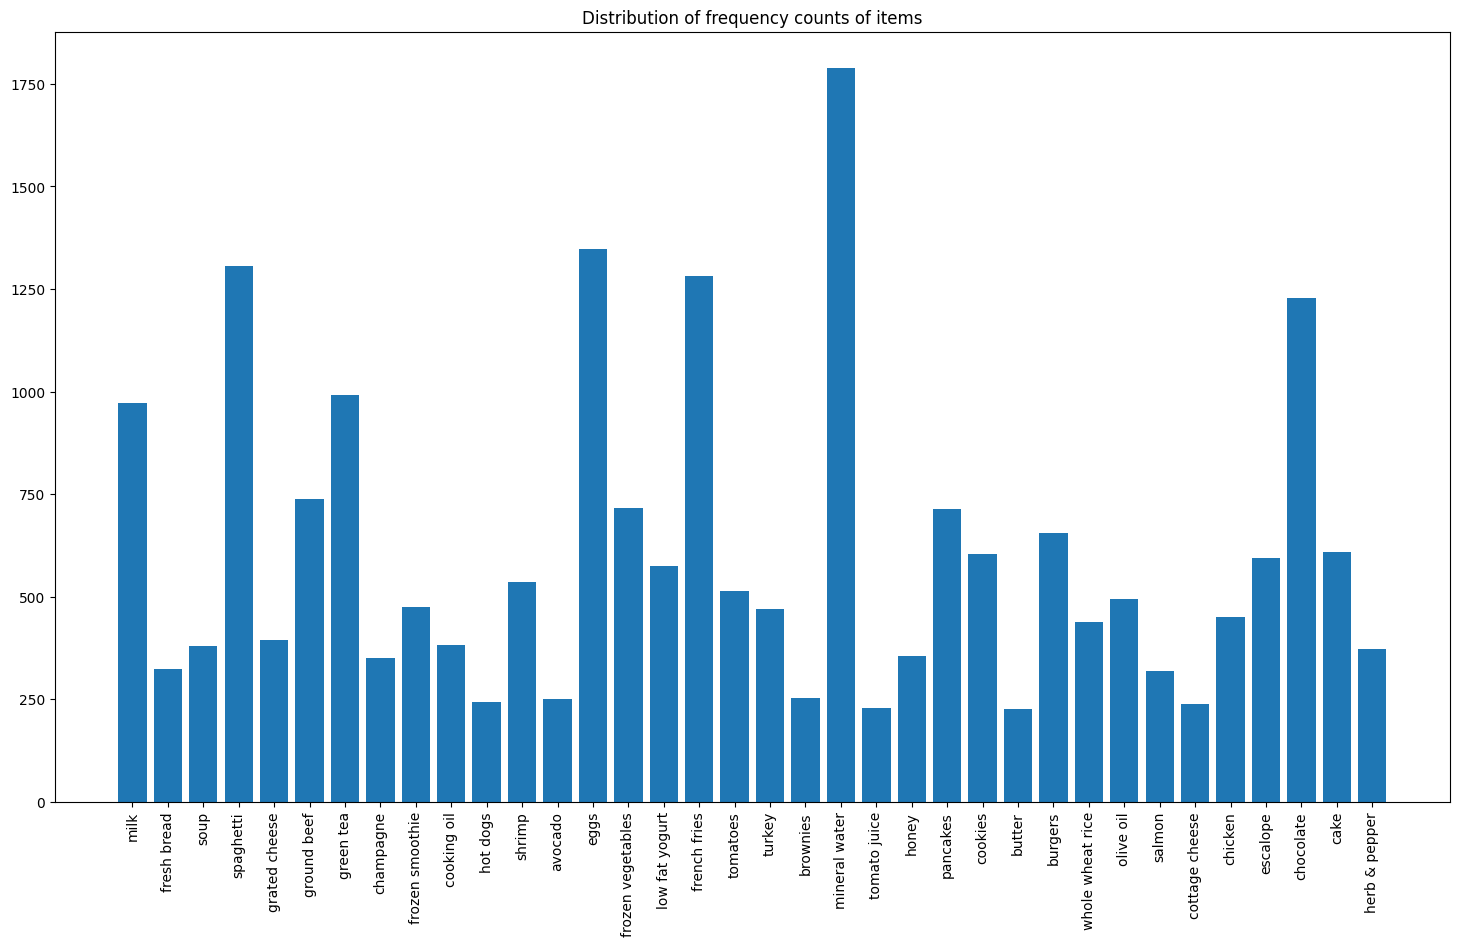

In [33]:
plt.figure(figsize=(18,10))
plt.bar(df_columns_count_greater_225,count_items_greater_than_225)
plt.xticks(rotation=90)
plt.title('Distribution of frequency counts of items')
plt.show()

#Market Basket Analysis


In [34]:
df_bought_more_than_1=df2[(df2>0).sum(axis=1)>=2]

In [35]:
len(df_bought_more_than_1)

5747

#Apply the Apriori Algorithm

In [37]:
#Import required packages
from mlxtend.frequent_patterns import association_rules, apriori


# Apriori Model-1

In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 0.1% out of the whole transaction, it means I will give the support value of 0.001.

In [38]:
# compute frequent items using the Apriori algorithm - Get only one item
frequent_itemsets = apriori(df_bought_more_than_1, min_support = 0.001, use_colnames=True)
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

c:\Python\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
frequent_itemsets.head()

,support,itemsets
0,0.013572,(magazines)
1,0.060901,(herb & pepper)
2,0.006438,(shampoo)
3,0.100748,(cake)
4,0.015138,(extra dark chocolate)


We can see that muushroom cream sauce has support value of 0.24013,mineral water has value of 0.294936 etc .

In [40]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(herb & pepper),(magazines),0.060901,0.013572,0.001218,0.020000,1.473590,0.000391,1.006559
1,(magazines),(herb & pepper),0.013572,0.060901,0.001218,0.089744,1.473590,0.000391,1.031686
2,(mayonnaise),(magazines),0.007308,0.013572,0.001218,0.166667,12.279915,0.001119,1.183713
3,(magazines),(mayonnaise),0.013572,0.007308,0.001218,0.089744,12.279915,0.001119,1.090563
4,(chocolate),(magazines),0.201148,0.013572,0.002784,0.013841,1.019785,0.000054,1.000272


In [41]:
rules[rules['antecedents']==frozenset({'mushroom cream sauce'})].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46495,(mushroom cream sauce),"(pasta, french fries, escalope)",0.024013,0.002088,0.001392,0.057971,27.763285,0.001342,1.059322
12883,(mushroom cream sauce),"(pasta, escalope)",0.024013,0.007656,0.003306,0.137681,17.983037,0.003122,1.150785
21879,(mushroom cream sauce),"(pasta, french fries)",0.024013,0.004002,0.001392,0.057971,14.485192,0.001296,1.057290
12993,(mushroom cream sauce),"(fresh bread, escalope)",0.024013,0.004698,0.001044,0.043478,9.254428,0.000931,1.040543
2075,(mushroom cream sauce),(pasta),0.024013,0.018792,0.003480,0.144928,7.712024,0.003029,1.147514
38520,(mushroom cream sauce),"(escalope, chocolate, spaghetti)",0.024013,0.005742,0.001044,0.043478,7.571805,0.000906,1.039451
12987,(mushroom cream sauce),"(escalope, spaghetti)",0.024013,0.018270,0.002262,0.094203,5.156039,0.001823,1.083829
12975,(mushroom cream sauce),"(french fries, escalope)",0.024013,0.021402,0.002610,0.108696,5.078650,0.002096,1.097939
12981,(mushroom cream sauce),"(escalope, green tea)",0.024013,0.011658,0.001392,0.057971,4.972529,0.001112,1.049163
24905,(mushroom cream sauce),"(french fries, shrimp)",0.024013,0.013050,0.001218,0.050725,3.886860,0.000905,1.039687


In [42]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
55635,"(cookies, low fat yogurt)","(french fries, shallot)",0.006960,0.003480,0.001218,0.175000,50.286250,0.001194,1.207903,2
55638,"(french fries, shallot)","(cookies, low fat yogurt)",0.003480,0.006960,0.001218,0.350000,50.286250,0.001194,1.527754,2
65342,"(ground beef, rice)","(herb & pepper, grated cheese, mineral water)",0.005742,0.003654,0.001044,0.181818,49.757576,0.001023,1.217756,2
65327,"(herb & pepper, grated cheese, mineral water)","(ground beef, rice)",0.003654,0.005742,0.001044,0.285714,49.757576,0.001023,1.391961,3
55630,"(cookies, french fries, low fat yogurt)",(shallot),0.002610,0.009396,0.001218,0.466667,49.665432,0.001194,1.857382,3


#Apriori Model-2

In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 0.1% out of the whole transaction, it means I will give the support value of 0.001 and max_len=3,which means antecedents we are setting 3.

In [43]:
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets2 = apriori(df_bought_more_than_1, min_support = 0.001, max_len = 3, use_colnames=True)
# compute all association rules for frequent_itemsets
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

c:\Python\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [44]:
frequent_itemsets2.head()

,support,itemsets
0,0.013572,(magazines)
1,0.060901,(herb & pepper)
2,0.006438,(shampoo)
3,0.100748,(cake)
4,0.015138,(extra dark chocolate)


In [45]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(herb & pepper),(magazines),0.060901,0.013572,0.001218,0.020000,1.473590,0.000391,1.006559
1,(magazines),(herb & pepper),0.013572,0.060901,0.001218,0.089744,1.473590,0.000391,1.031686
2,(mayonnaise),(magazines),0.007308,0.013572,0.001218,0.166667,12.279915,0.001119,1.183713
3,(magazines),(mayonnaise),0.013572,0.007308,0.001218,0.089744,12.279915,0.001119,1.090563
4,(chocolate),(magazines),0.201148,0.013572,0.002784,0.013841,1.019785,0.000054,1.000272


In [46]:
rules2['lhs items'] = rules2['antecedents'].apply(lambda x:len(x) )
rules2[rules2['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
7473,"(cooking oil, extra dark chocolate)",(light cream),0.002088,0.020010,0.001044,0.500000,24.986957,0.001002,1.959979,2
23056,"(cookies, low fat yogurt)",(shallot),0.006960,0.009396,0.001566,0.225000,23.945833,0.001501,1.278198,2
12880,"(mushroom cream sauce, escalope)",(pasta),0.007482,0.018792,0.003306,0.441860,23.512705,0.003165,1.757997,2
8106,"(fresh tuna, honey)",(fromage blanc),0.005220,0.017400,0.002088,0.400000,22.988000,0.001997,1.637666,2
7472,"(cooking oil, light cream)",(extra dark chocolate),0.003654,0.015138,0.001044,0.285714,18.873563,0.000989,1.378806,2


#Apriori Model-3

In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 1% out of the whole transaction, it means I will give the support value of 0.03 and max_len=3,which means antecedents we are setting 3.

In [47]:
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets3 = apriori(df_bought_more_than_1, min_support = 0.01, max_len = 3, use_colnames=True)
# compute all association rules for frequent_itemsets
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)

c:\Python\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [48]:
frequent_itemsets3.head()

,support,itemsets
0,0.013572,(magazines)
1,0.060901,(herb & pepper)
2,0.100748,(cake)
3,0.015138,(extra dark chocolate)
4,0.031321,(vegetables mix)


In [49]:
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(herb & pepper),(mineral water),0.060901,0.294936,0.022272,0.365714,1.239976,0.004310,1.111587
1,(mineral water),(herb & pepper),0.294936,0.060901,0.022272,0.075516,1.239976,0.004310,1.015809
2,(herb & pepper),(eggs),0.060901,0.218897,0.016356,0.268571,1.226932,0.003025,1.067915
3,(eggs),(herb & pepper),0.218897,0.060901,0.016356,0.074722,1.226932,0.003025,1.014937
4,(herb & pepper),(ground beef),0.060901,0.124587,0.020880,0.342857,2.751955,0.013293,1.332151


In [50]:
rules3['lhs items'] = rules3['antecedents'].apply(lambda x:len(x) )
rules3[rules3['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
608,"(milk, mineral water)",(soup),0.062641,0.064555,0.011136,0.177778,2.753878,0.007092,1.137703,2
622,"(frozen vegetables, spaghetti)",(ground beef),0.036367,0.124587,0.011310,0.311005,2.496291,0.006779,1.270565,2
620,"(ground beef, frozen vegetables)",(spaghetti),0.022098,0.218201,0.011310,0.511811,2.345596,0.006488,1.601427,2
592,"(spaghetti, mineral water)",(ground beef),0.077954,0.124587,0.022272,0.285714,2.293296,0.012560,1.225579,2
609,"(soup, mineral water)",(milk),0.030103,0.163390,0.011136,0.369942,2.264172,0.006218,1.327831,2
